<a href="https://colab.research.google.com/github/dani-jimlar/XAI_AIPI_590/blob/main/XAI_Assignment_10_Tutorial_Rule_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 10

## Rule Fit Tutorial. Decision rules

Daniela Jiménez Lara

# Packages
For this tutorial we are going to use the imodels libarry compatible with scikit-learn: https://github.com/csinva/imodels?tab=readme-ov-file. Make sure to install it.

In [ ]:
pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 4.5 MB/s eta 0:00:00


## Data: PAES- Chilean Higher Education Admission Test (Prueba de acceso a la Educación Superior)

For this tutorial we are going to use PAES,  the most recent selection test to access the Chilean higher education system. It favors the application and understanding of knowledge instead of memorization; and aims to close the existing gap between private and public school students' scores. The data gives the scores on Mathematics and Reading Competency as well as socioeconomic variables.

### Variables

We are going to select some socioeconomic variables to predict the Mathematics score from PAES.

**y**: MATE1_REG_ACTUAL

**X**:

Socio-economic:
-  Sex
-  Per capita incomme
-  High school gpa average
-  Public or Private highschool

Tecnology access:
- Computer'
- 'Tablet'
- 'SmartPhone'
- 'HOGAR_CONEXION_INTERNET'

School Facilities:
- 'Library',
- 'Study_rooms'
- 'Science_lab'
- 'Computer_lab'


### Load and prepare the data

Run the following chunks of code to load and prepare the data


In [ ]:
""" Clean data """
import pandas as pd

# load data

path_score='/content/drive/MyDrive/XAI_2/asiign_4/A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv'
test_score = pd.read_csv(path_score, delimiter=";", low_memory=False)

score_math=test_score[['MRUN', 'MATE1_REG_ACTUAL', 'ANYO_PROCESO', 'COD_SEXO', 'FECHA_NACIMIENTO', 'RBD', 'CODIGO_ENS',
                       'LOCAL_EDUCACIONAL', 'UNIDAD_EDUCATIVA', 'NOMBRE_UNIDAD_EDUC', 'RAMA_EDUCACIONAL', 'DEPENDENCIA',
                       'CODIGO_REGION_EGRESO', 'NOMBRE_REGION_EGRESO', 'CODIGO_PROVINCIA_EGRESO', 'NOMBRE_PROVINCIA_EGRESO',
                       'CODIGO_COMUNA_EGRESO', 'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO', 'PROMEDIO_NOTAS', 'PTJE_NEM']]
score_read=test_score[['MRUN', 'CLEC_REG_ACTUAL']]


path_socio='/content/drive/MyDrive/XAI_2/asiign_4/B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv'
socioeconomic = pd.read_csv(path_socio, delimiter=";")

data = pd.merge(score_math, socioeconomic, how="inner", on=["MRUN",'ANYO_PROCESO','FECHA_NACIMIENTO'])
data = pd.merge(score_read, data, how="inner", on="MRUN")

# Drop nas from target vaiables and drop uneeded columns
data = data[data["MATE1_REG_ACTUAL"] != " "]
data = data[data["CLEC_REG_ACTUAL"] != " "]
data = data[data["DEPENDENCIA"] != " "]
data = data[data["DEPENDENCIA"] != " "]

data["MATE1_REG_ACTUAL"] = data["MATE1_REG_ACTUAL"].astype(int)
data["CLEC_REG_ACTUAL"] = data["CLEC_REG_ACTUAL"].astype(int)

data = data[data["MATE1_REG_ACTUAL"] > 0]
data = data[data["CLEC_REG_ACTUAL"] > 0]
data = data.drop(columns=data.filter(like='CODIGO').columns)


# map and tranform catagorical variables, rename columns

dependency_mapping = {
    "1": "Public School",
    "2": "Public School",
    "3": "Private subsidized School",
    "4": "Private non-subsidized School",
    "5": "Delegated Administration School",
    "6": "Public School",
}

gender_mapping = {
    1: "Male",
    2: "Female"
}

razon_paes={
    1:' Porque busco mejorar alguno(s) de mis resultados pasados.'
    ,2: 'Para estudiar una carrera técnica'
    ,3: 'Para estudiar una carrera universitaria'
    ,4: 'Para ingresar a la PDI, Fuerzas armadas'
    ,5: 'Por otra razón'
    ,6: 'Porque no pude rendir alguna aplicación pasada '
    ,7: 'Porque soy profesional de la educación y deseo conocer el instrumento'
    ,8: 'Porque me obligaron a inscribirme en el colegio'
    ,9: 'Prefiero no responder'
}

uso_espacio_mapping={
     0: 'No aplica'
    ,1: 'Menos de 1 hora a la semana '
    ,2: 'Entre 1 y 3 horas a la semana'
    ,3: 'Entre 3 y 5 horas a la semana'
    ,4: 'Más de 5 horas a la semana'
}

tranquilidad_colegio_mapping={
    1: 'Nunca'
    ,2: 'Rara vez'
    ,3: 'A menudo'
    ,4: 'Casi siempre'
    ,5: 'Siempre'
    ,9: 'Prefiero no responder'
}

data["DEPENDENCIA"] = data["DEPENDENCIA"].replace(dependency_mapping)

data["SEXO"] = data["SEXO"].replace(gender_mapping)
data["RAZON_PRINCIPAL_PAES"] = data["RAZON_PRINCIPAL_PAES"].replace(razon_paes)

data["TRANQUILIDAD_COLEGIO"]= data["TRANQUILIDAD_COLEGIO"].replace(tranquilidad_colegio_mapping)
data["TRABAJO_GRUPO_COLEGIO"] = data["TRABAJO_GRUPO_COLEGIO"].replace(tranquilidad_colegio_mapping)


data.rename(columns={'ESPACIO_1':'Library',}, inplace=True)
data.rename(columns={'ESPACIO_2':'Study_rooms',}, inplace=True)
data.rename(columns={'ESPACIO_3':'Science_lab',}, inplace=True)
data.rename(columns={'ESPACIO_4':'Art_room',}, inplace=True)
data.rename(columns={'ESPACIO_5':'Kitchen',}, inplace=True)
data.rename(columns={'ESPACIO_6':'Tech_lab',}, inplace=True)
data.rename(columns={'ESPACIO_7':'PE_Gym',}, inplace=True)
data.rename(columns={'ESPACIO_8':'Computer_lab',}, inplace=True)


data.rename(columns={'DISPOSITIVO_1':'Computer',}, inplace=True)
data.rename(columns={'DISPOSITIVO_2':'Tablet',}, inplace=True)
data.rename(columns={'DISPOSITIVO_3':'SmartPhone',}, inplace=True)
data.rename(columns={'DISPOSITIVO_4':'No tech devices',}, inplace=True)
data.drop(['DISPOSITIVO_5','ESPACIO_9','FECHA_NACIMIENTO','MRUN','CLEC_REG_ACTUAL','COD_SEXO'], axis=1, inplace=True)
data.drop(columns=data.filter(like='USO_').columns, inplace=True)

data['PROMEDIO_NOTAS'] = pd.to_numeric(data['PROMEDIO_NOTAS'], errors='coerce')

data.drop(data[data['HOGAR_CONEXION_INTERNET'] == '9'].index, inplace=True)
data.drop(data[data['INGRESO_PERCAPITA_GRUPO_FA']== 99].index, inplace=True)

# construct region variable

def group_regions(region):
    major_regions = [
        'REGION METROPOLITANA DE SANTIAGO',
        'REGION DE VALPARAISO',
        'REGION DEL BIOBIO',
        'REGION DEL MAULE',
        'REGION DE LA ARAUCANIA'
    ]
    return region if region in major_regions else 'OTRAS REGIONES'

data['REGION'] = data['NOMBRE_REGION_EGRESO'].apply(group_regions)



data.shape

(175204, 35)

In [ ]:
""" Reduce dataset and prepare data as it has categorical and numerical variables"""

numerical_vars = ['PTJE_NEM', 'INGRESO_PERCAPITA_GRUPO_FA']

binary_vars = [ 'SEXO',
               'Computer', 'Tablet', 'SmartPhone', 'HOGAR_CONEXION_INTERNET','Library', 'Study_rooms', 'Science_lab',
               'Art_room', 'Kitchen', 'Tech_lab', 'PE_Gym', 'Computer_lab',
             ]

target = 'MATE1_REG_ACTUAL'

X = data[numerical_vars].copy()

# encode DEPENDENCIA
le = LabelEncoder()
X['DEPENDENCIA'] = le.fit_transform(data['DEPENDENCIA'])



# encode REGION
le_reg = LabelEncoder()
X['REGION'] = le_reg.fit_transform(data['REGION'])



# transform binary categories to binary vars
for col in binary_vars:
        if col == 'SEXO':
            X[col] = (data[col] == 'Male').astype(int)
        else:
            X[col] = (data[col] == 'S').astype(int)

y = data[target]

## Rulefit Classifier



The RuleFit algorithm by Friedman and Popescu (2008) learns sparse linear models that include automatically detected interaction effects in the form of decision rules.




RuleFit learns a sparse linear model with the original features and also a number of new features that are decision rules. These new features capture interactions between the original features. RuleFit automatically generates these features from decision trees. Each path through a tree can be transformed into a decision rule by combining the split decisions into a rule. The node predictions are discarded and only the splits are used in the decision rules.

Learn more on: https://christophm.github.io/interpretable-ml-book/rulefit.html

To fit this model, our target variable will be transformed to a binary output to make the computing time efficient. We are going to create a dummy for scores higher or equal to the third quartile: 609, as the distribution of the score is as follows:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


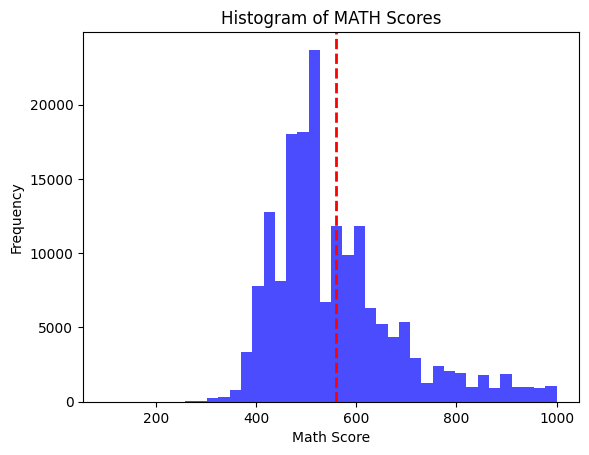

In [ ]:
import matplotlib.pyplot as plt
mean_value = data["MATE1_REG_ACTUAL"].mean()

data["MATE1_REG_ACTUAL"].plot(kind='hist', bins=40, color='blue', alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title('Histogram of MATH Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.show()


### Split data into train and split

In [ ]:
from sklearn.model_selection import train_test_split
from imodels import  GreedyTreeRegressor # import any imodels model here
import numpy as np
# prepare data (a sample clinical dataset)
X_a = X.to_numpy()
y_a= y.to_numpy().ravel()
features= X.columns
X_train, X_test, y_train, y_test = train_test_split(
    X_a, y_a, random_state=42)

y_test_b = np.where(y_test >= 609, 1, 0)
y_train_b = np.where(y_train >= 609, 1, 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Implement model

RuleFit follows these steps:
1. Train ensemble of decision trees and generate decision rules
2. Transfrom each rule to a binary feature
3. Fit Linear model with Lasso Regularization to keep most important rules
4. Rules with the highest absolute coefficient values have the strongest impact on predicting y.

And imodels lets us implement it.



In [ ]:
from imodels import RuleFitClassifier

#set model
model_t = RuleFitClassifier( n_estimators=500,  # number of trees to generate rules
                            max_rules=30,      # maximum number of rules to include
                            tree_size=4,       # average number of terminal nodes
                            sample_fract=0.5,  # fraction of data to use for each tree
                            memory_par=0.01 )   # memory parameter for rule generation


#Fit the model
model_t.fit(X_train, y_train_b, feature_names=features)   # fit model
preds_t = model_t.predict(X_test) # discrete predictions: shape is (n_test, 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Print the rules and their coeficients

In [ ]:
model_t.visualize()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rule,coef
36,PTJE_NEM <= 867.5 and INGRESO_PERCAPITA_GRUPO_FA <= 9.5,-0.03
42,PTJE_NEM <= 875.0 and DEPENDENCIA > 1.5,-0.15
35,PTJE_NEM <= 853.5 and DEPENDENCIA > 1.5,-0.18
21,PTJE_NEM <= 805.0,-0.04
41,PTJE_NEM <= 818.5 and INGRESO_PERCAPITA_GRUPO_FA <= 9.5,-0.21
28,PTJE_NEM <= 833.5 and DEPENDENCIA > 1.5,-0.11
34,PTJE_NEM <= 790.0,-0.09
30,PTJE_NEM <= 790.5,-0.07
27,PTJE_NEM <= 782.5,-0.00
32,PTJE_NEM <= 775.0,-0.04


you can also print alll the rules without their coeficients

In [ ]:
model_t.rules_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[PTJE_NEM <= 711.0,
 PTJE_NEM <= 772.5,
 PTJE_NEM <= 719.5,
 PTJE_NEM <= 890.0 and SEXO <= 0.5,
 PTJE_NEM <= 805.0,
 PTJE_NEM <= 776.5,
 PTJE_NEM <= 889.5 and SEXO <= 0.5,
 PTJE_NEM <= 740.0,
 DEPENDENCIA > 1.5 and PTJE_NEM <= 935.5 and SEXO <= 0.5,
 PTJE_NEM <= 740.5,
 PTJE_NEM <= 782.5,
 DEPENDENCIA > 1.5 and PTJE_NEM <= 833.5,
 PTJE_NEM <= 883.0 and SEXO <= 0.5,
 PTJE_NEM <= 790.5,
 PTJE_NEM <= 748.0,
 PTJE_NEM <= 775.0,
 PTJE_NEM <= 725.5,
 PTJE_NEM <= 790.0,
 DEPENDENCIA > 1.5 and PTJE_NEM <= 853.5,
 INGRESO_PERCAPITA_GRUPO_FA <= 9.5 and PTJE_NEM <= 867.5,
 PTJE_NEM <= 718.5,
 PTJE_NEM <= 744.0,
 INGRESO_PERCAPITA_GRUPO_FA <= 9.5 and PTJE_NEM <= 904.0 and SEXO <= 0.5,
 PTJE_NEM <= 747.0,
 INGRESO_PERCAPITA_GRUPO_FA <= 9.5 and PTJE_NEM <= 818.5,
 DEPENDENCIA > 1.5 and PTJE_NEM <= 875.0,
 DEPENDENCIA <= 2.5 and DEPENDENCIA > 0.5 and PTJE_NEM > 676.0]

### Coefficient visualization
Use this visualization to aid you in the interpretability of the rules that predict the Math score the most.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


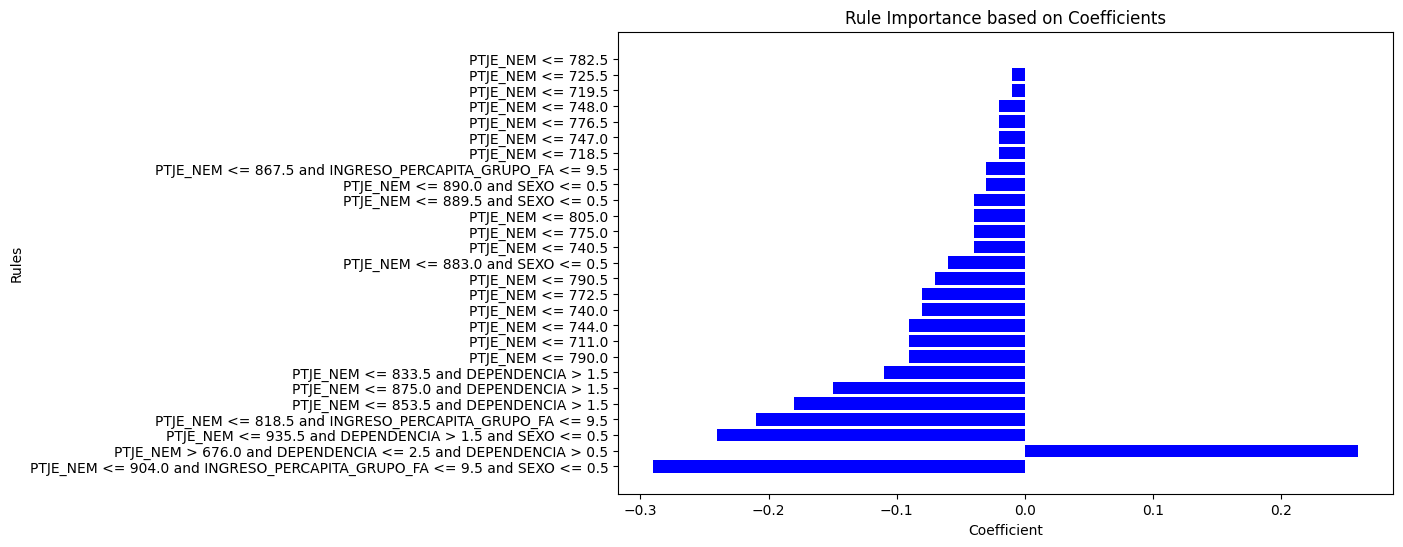

In [ ]:
import matplotlib.pyplot as plt


df=model_t.visualize()

# Sort by the absolute value of the coefficients
df["Abs_Coefficient"] = df["coef"].abs()
df = df.sort_values(by="Abs_Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df["rule"], df["coef"], color="blue")
plt.title("Rule Importance based on Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Rules")
plt.show()
